# Simulation of Continuous Random Variables

- author: Edward J. Xu
- date: June 1, 2020

In [41]:
import math
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as st
import random as rd
from importlib import reload  
import TidySimStat as tss
tss = reload(tss)

`TidySimStat.py` by Edward J. Xu is imported. Last modifed date is June 1, 2020.


## 1. Inverse Method

$$ \begin{aligned}
    U &= F(X) \\
    X &= F^{-1}(U)
\end{aligned} $$

### 1-1. to Simulate Exponential Distribution

In [8]:
def sim_exp(expect, u=True):
    """Simulate a realisation of a random variable with exponential distribution
    and specified expect.
    
    Keyword Argument
    ================
    expect: expect of the distribution
    u: input simulated random number. If missing, simulate one.
       The default value should be set at `rd.random()` directly,
       or the realisation in different calls will the same.
    
    Note
    ====
    The CDF is defined as `1 - math.exp(- x / expect)`.
    The PDF is thus `math.exp(- x / expect) / expect`.
    """
    if u:
        u = rd.random()
    elif u < 0 or u > 1:
        raise Exception("Please input a simulated random number of leave it blank!")
        
    x = - math.log(u) * expect
    return x

One-sample Kolmogorov–Smirnov test: 0.0184.
Null hypothesis: two populations have the same distribution. 
The input p value is 1.0000. 
Is the p value smaller than 0.05? False. 
If reject the null hypothesis? False. 
If from the same distribution? True.


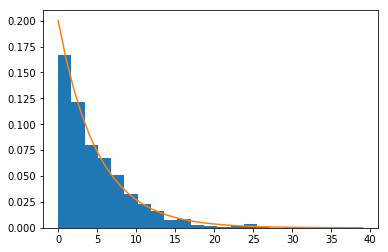

In [9]:
def exam_sim_exp():
    num_sim = 1000
    expect = 5
    samples = [sim_exp(expect) for i in range(1000)]
    
    stat = tss.cal_stat_ks(samples, cdf = lambda x: 1 - math.exp(- x / expect))
    pvalue = tss.cal_pvalue_ks(stat)
    tss.test_dist(pvalue)
    
    xs = [i for i in range(40)]
    densities = [math.exp(- i / expect) / expect for i in xs]
    
    plt.hist(samples, bins = 20, density=True)
    plt.plot(xs, densities)
    plt.show()
    
    
exam_sim_exp()

In [10]:
help(tss.cal_stat_ks)

Help on function cal_stat_ks in module TidySimStat:

cal_stat_ks(samples, cdf)
    Calculate statistic in one-sample Kolmogorov–Smirnov test.
    
    Keyword Arguments
    samples: list of samples
    cdf: target cumulative density function



## 1-2. to Simulate Pareto Distribution

In [11]:
def sim_pareto(beta, k, u=True):
    """Simulate a realisation of a random variable with Pareto distribution
    and specified beta and k.
    
    Keyword Argument
    ================
    beta: parameter in the CDF.
    k: parameter in the CDf
    
    Note
    ====
    The CDF is defined as `1 - (beta / x)**k`.
    The PDF is thus `k * (beta)**k / x**(k+1)`.
    """
    if u:
        u = rd.random()
    elif u < 0 or u > 1:
        raise Exception("Please input a simulated random number of leave it blank!")
        
    x = beta / (1 - u)**(1/k)
    return x

One-sample Kolmogorov–Smirnov test: 0.0179.
Null hypothesis: two populations have the same distribution. 
The input p value is 1.0000. 
Is the p value smaller than 0.05? False. 
If reject the null hypothesis? False. 
If from the same distribution? True.


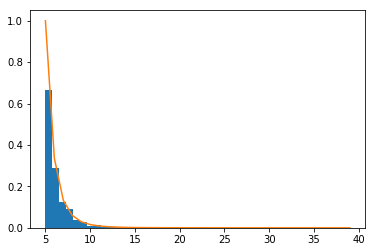

In [12]:
def exam_sim_pareto():
    num_sim = 1000
    beta = 5
    k = 5
    samples = [sim_pareto(beta, k) for i in range(1000)]
    
    ## Perform Kolmogorov–Smirnov test
    stat = tss.cal_stat_ks(samples, cdf = lambda x: 1 - (beta / x)**k)
    pvalue = tss.cal_pvalue_ks(stat)
    tss.test_dist(pvalue)
    
    ## Calculate theoretical values
    xs = [i for i in range(5, 40)]
    densities = [k * (beta)**k / i**(k+1) for i in xs]
    
    plt.hist(samples, bins = 20, density=True)
    plt.plot(xs, densities)
    plt.show()
    
    
exam_sim_pareto()

## 2. Simulate Normal RVs using Central Limit Theory

In [13]:
def sim_norm(num_samples:int):
    """Simulate a realisation of a random variable with normal distribution
    according to central limit theory.
    
    Keyword Argument
    ================
    num_samples: number of samples for one realisation. 
    
    Note
    ====
    The CDF is defined as `st.norm.cdf`.
    The PDF is thus `st.norm.pdf`.
    """
    us = [rd.random() for i in range(num_samples)]
        
    x = sum(us) - num_samples / 2
    return x

One-sample Kolmogorov–Smirnov test: 0.0288.
Null hypothesis: two populations have the same distribution. 
The input p value is 1.0000. 
Is the p value smaller than 0.05? False. 
If reject the null hypothesis? False. 
If from the same distribution? True.


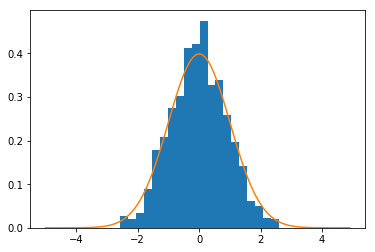

In [14]:
def exam_sim_norm():
    num_sim = 1000
    beta = 5
    k = 5
    samples = [sim_norm(10) for i in range(1000)]
    
    ## Perform Kolmogorov–Smirnov test
    stat = tss.cal_stat_ks(samples, cdf = st.norm.cdf)
    pvalue = tss.cal_pvalue_ks(stat)
    tss.test_dist(pvalue)
    
    ## Calculate theoretical values
    xs = [i / 10 for i in range(-50, 50)]
    densities = [st.norm.pdf(i) for i in xs]
    
    plt.hist(samples, bins = 20, density=True)
    plt.plot(xs, densities)
    plt.show()
    
    
exam_sim_norm()

## 2. Box-Mullter Method for Normal RVs

In [24]:
def sim_cossin():
    while True:
        v1 = 2 * rd.random() - 1
        v2 = 2 * rd.random() - 1
        r_square = v1**2 + v2**2
        if r_square <= 1:
            break
    sample = [0, 0]
    sample[0] = v1 / math.sqrt(r_square)  # cosine
    sample[1] = v2 / math.sqrt(r_square)  # sine
    return sample

In [27]:
def sim_norm_bm():
    """Simulate a realisation of a random variable with normal distribution
    using Box-Muller method.
    
    Note
    ====
    The CDF is defined as `st.norm.cdf`.
    The PDF is thus `st.norm.pdf`.
    """
    samples = sim_cossin()
    u1 = rd.random()
    z1 = math.sqrt(- 2 * math.log(u1)) * samples[0]
    z2 = math.sqrt(- 2 * math.log(u1)) * samples[0]

    return [z1, z2]

In [33]:
sim_norm_bm()[0]

0.34756819900673486

One-sample Kolmogorov–Smirnov test: 0.0375.
Null hypothesis: two populations have the same distribution. 
The input p value is 1.0000. 
Is the p value smaller than 0.05? False. 
If reject the null hypothesis? False. 
If from the same distribution? True.


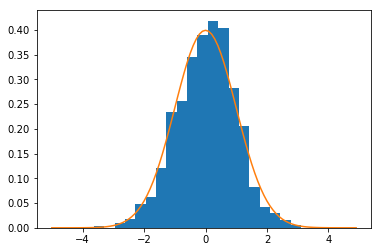

In [34]:
def exam_sim_norm_bm():
    num_sim = 1000
    beta = 5
    k = 5
    samples = [sim_norm_bm()[0] for i in range(1000)]
    
    ## Perform Kolmogorov–Smirnov test
    stat = tss.cal_stat_ks(samples, cdf = st.norm.cdf)
    pvalue = tss.cal_pvalue_ks(stat)
    tss.test_dist(pvalue)
    
    ## Calculate theoretical values
    xs = [i / 10 for i in range(-50, 50)]
    densities = [st.norm.pdf(i) for i in xs]
    
    plt.hist(samples, bins = 20, density=True)
    plt.plot(xs, densities)
    plt.show()
    
    
exam_sim_norm_bm()